<a href="https://colab.research.google.com/github/mariabandeira/AdministracaoPublica/blob/main/CadUnico/RNN/TrainningPB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [78]:
treated_data_PB = pd.read_csv('https://raw.githubusercontent.com/mariabandeira/AdministracaoPublica/refs/heads/main/CadUnico/BasesPB/cadunico_pb_cleaned.csv', sep=',', encoding='utf-8')

In [79]:
treated_data_PB.dropna(inplace=True)
treated_data_PB.drop_duplicates(inplace=True)

### Treinando o modelo RNN

In [80]:
# analisando a distribuição da variável alvo (marc_pbf)
target_distribution = treated_data_PB['marc_pbf'].value_counts(normalize=True) * 100

print(round(target_distribution, 2))

marc_pbf
1    60.96
0    39.04
Name: proportion, dtype: float64


In [81]:
# separar X (features) e y (target)
X = treated_data_PB.drop('marc_pbf', axis=1)
y = treated_data_PB['marc_pbf']

# treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# criando uma instância do RandomUnderSampling
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')

# balanceando os dados
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print(y_resampled.value_counts())

marc_pbf
0    49935
1    49935
Name: count, dtype: int64


In [82]:
# aplicar padronização nas features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

print("Primeiros dados escalados (padronizados):")
print(X_train_scaled[:5])

Primeiros dados escalados (padronizados):
[[-1.94675229  0.25998787 -0.66351538  0.         -1.13901679  0.21086124
   1.58901493 -0.30371528 -0.63344419 -0.68283037 -0.32494349 -0.64034823
  -0.30392907 -1.16344252  0.          0.08346976  0.07556882]
 [-0.56513795 -0.13902563 -0.66351538  0.         -1.13901679 -1.08954091
  -0.53557624 -0.30371528 -0.63344419 -0.68283037 -0.32494349 -0.64034823
  -0.30392907 -1.16344252  0.          0.08346976  1.48597033]
 [-0.56513795  0.18154932 -0.66351538  0.          0.17970507  0.21086124
   1.58901493 -0.30371528 -0.63344419 -0.68283037 -0.32494349 -0.64034823
  -0.30392907 -1.16344252  0.          0.08346976  0.78076958]
 [ 0.81647638  0.31796419 -0.66351538  0.          0.839066    0.21086124
  -0.53557624 -0.30371528 -0.63344419 -0.68283037 -0.32494349 -0.64034823
  -0.30392907 -1.16344252  0.          0.08346976 -0.62963193]
 [-0.56513795  0.42709609 -0.66351538  0.          1.49842693  1.51126339
   1.58901493 -0.30371528 -0.63344419 -0

In [83]:
# Ajustar formato para a RNN (samples, time steps, features)
X_train_rnn = np.expand_dims(X_train_scaled, axis=1)
X_test_rnn = np.expand_dims(X_test_scaled, axis=1)

In [84]:
# Construir a RNN
model = Sequential([
    SimpleRNN(32, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [85]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [86]:
history = model.fit(X_train_rnn, y_resampled, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test))

Epoch 1/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7922 - loss: 0.4391 - val_accuracy: 0.8549 - val_loss: 0.3670
Epoch 2/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8429 - loss: 0.3701 - val_accuracy: 0.8560 - val_loss: 0.3688
Epoch 3/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8441 - loss: 0.3686 - val_accuracy: 0.8544 - val_loss: 0.3689
Epoch 4/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8435 - loss: 0.3671 - val_accuracy: 0.8631 - val_loss: 0.3556
Epoch 5/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8448 - loss: 0.3651 - val_accuracy: 0.8613 - val_loss: 0.3588
Epoch 6/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8438 - loss: 0.3664 - val_accuracy: 0.8599 - val_loss: 0.3628
Epoch 7/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8442 - loss: 0.3650 - val_accuracy: 0.8634 - val_loss: 0.3575
Epoch 8/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8457 - loss: 0

In [87]:
y_pred_prob = model.predict(X_test_rnn)
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))

1708/1708 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0       0.86      0.76      0.81     21189
           1       0.86      0.92      0.89     33467

    accuracy                           0.86     54656
   macro avg       0.86      0.84      0.85     54656
weighted avg       0.86      0.86      0.86     54656



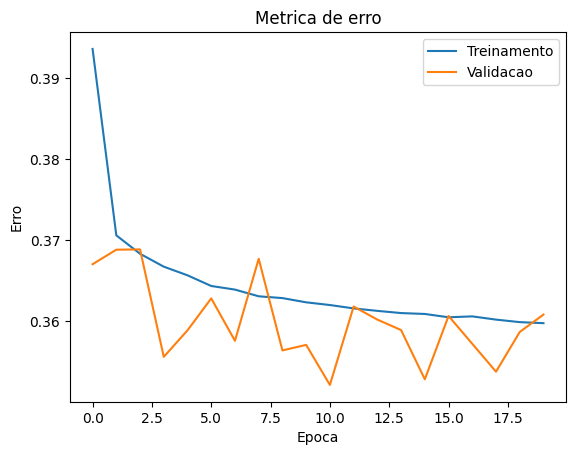

3121/3121 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

--> Acuracia (treino): 0.8458
--> Acuracia (validacao): 0.8610
--> acc_train - acc_val = -0.0152
--> E_val - E_in = 0.0011


In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train_rnn))
acc_train = accuracy_score(y_resampled, pred)

pred = np.round(model.predict(X_test_rnn))
acc_val = accuracy_score(y_test, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

In [89]:
model = Sequential()
model.add(Dense(32, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 1, 32)          │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1, 16)          │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1, 16)          │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1, 1)           │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,393 (5.44 KB)

 Trainable params: 1,393 (5.44 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
history = model.fit(X_train_rnn, y_resampled, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test))

Epoch 1/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8031 - loss: 0.4286 - val_accuracy: 0.8560 - val_loss: 0.3678
Epoch 2/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8409 - loss: 0.3709 - val_accuracy: 0.8609 - val_loss: 0.3578
Epoch 3/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8422 - loss: 0.3714 - val_accuracy: 0.8576 - val_loss: 0.3649
Epoch 4/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8428 - loss: 0.3668 - val_accuracy: 0.8632 - val_loss: 0.3578
Epoch 5/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8450 - loss: 0.3654 - val_accuracy: 0.8621 - val_loss: 0.3532
Epoch 6/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8454 - loss: 0.3646 - val_accuracy: 0.8651 - val_loss: 0.3542
Epoch 7/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8431 - loss: 0.3647 - val_accuracy: 0.8635 - val_loss: 0.3612
Epoch 8/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8457 - loss: 0.

In [91]:
y_pred_prob = model.predict(X_test_rnn)
y_pred = (y_pred_prob > 0.5).astype(int)
y_pred = y_pred.flatten()
print(classification_report(y_test, y_pred))

1708/1708 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.76      0.81     21189
           1       0.86      0.93      0.89     33467

    accuracy                           0.87     54656
   macro avg       0.87      0.85      0.85     54656
weighted avg       0.87      0.87      0.86     54656



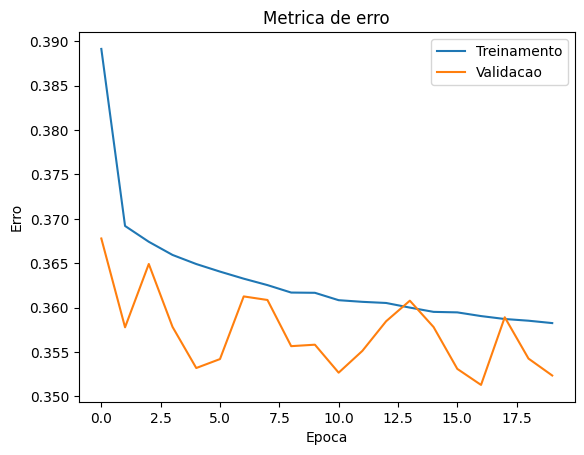

3121/3121 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

--> Acuracia (treino): 0.8478
--> Acuracia (validacao): 0.8654
--> acc_train - acc_val = -0.0176
--> E_val - E_in = -0.0059


In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train_rnn)).flatten() # Flatten the prediction to 1D
acc_train = accuracy_score(y_resampled, pred)

pred = np.round(model.predict(X_test_rnn)).flatten() # Flatten the prediction to 1D
acc_val = accuracy_score(y_test, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

### Selecionando features com SelectKBests

In [93]:
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_resampled, y_resampled)
X_test_selected = selector.transform(X_test)

selected_columns = X_train.columns[selector.get_support()]
print("Características selecionadas:", selected_columns)

Características selecionadas: Index(['vlr_renda_media_fam', 'qtd_comodos_domic_fam',
       'cod_agua_canalizada_fam', 'cod_abaste_agua_domic_fam', 'qtde_pessoas'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 3 14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [95]:
X_train_rnn = np.expand_dims(X_train_scaled, axis=1)
X_test_rnn = np.expand_dims(X_test_scaled, axis=1)

In [96]:
model = Sequential()
model.add(Dense(32, input_shape=(1, X_train_scaled.shape[1]), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 1, 32)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1, 16)          │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1, 16)          │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1, 1)           │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,009 (3.94 KB)

 Trainable params: 1,009 (3.94 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
history = model.fit(X_train_rnn, y_resampled, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test), callbacks=[early_stopping])

Epoch 1/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8103 - loss: 0.4208 - val_accuracy: 0.8582 - val_loss: 0.3689
Epoch 2/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8481 - loss: 0.3650 - val_accuracy: 0.8635 - val_loss: 0.3601
Epoch 3/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8436 - loss: 0.3684 - val_accuracy: 0.8657 - val_loss: 0.3612
Epoch 4/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8453 - loss: 0.3673 - val_accuracy: 0.8633 - val_loss: 0.3591
Epoch 5/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8437 - loss: 0.3676 - val_accuracy: 0.8628 - val_loss: 0.3630
Epoch 6/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8447 - loss: 0.3666 - val_accuracy: 0.8652 - val_loss: 0.3566
Epoch 7/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8431 - loss: 0.3700 - val_accuracy: 0.8666 - val_loss: 0.3611
Epoch 8/20
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8437 - loss: 0.

In [98]:
y_pred_prob = model.predict(X_test_rnn)
y_pred = (y_pred_prob > 0.5).astype(int)
y_pred = y_pred.flatten()
print(classification_report(y_test, y_pred))

1708/1708 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.75      0.81     21189
           1       0.86      0.94      0.90     33467

    accuracy                           0.87     54656
   macro avg       0.87      0.85      0.85     54656
weighted avg       0.87      0.87      0.86     54656



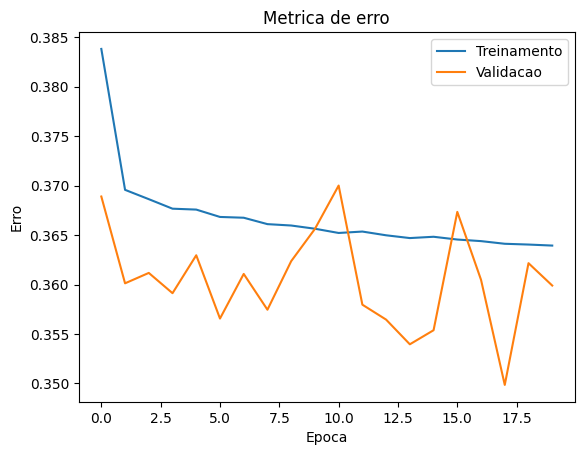

3121/3121 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

--> Acuracia (treino): 0.8470
--> Acuracia (validacao): 0.8665
--> acc_train - acc_val = -0.0195
--> E_val - E_in = -0.0040


In [99]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train_rnn)).flatten()
acc_train = accuracy_score(y_resampled, pred)

pred = np.round(model.predict(X_test_rnn)).flatten()
acc_val = accuracy_score(y_test, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

# BOCA DO JACARÉ: Overfitting